## TASK -1 

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D ,Conv2DTranspose,Reshape,Lambda
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from keras import metrics
from keras.regularizers import l2



Using TensorFlow backend.


In [0]:

import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# **DOWNLOADING AND EXTRACTING DATASET**

In [16]:
!curl --header "Host: doc-0c-4o-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,mr;q=0.6,hi;q=0.5,pa;q=0.4" --header "Referer: https://drive.google.com/uc?id=12OYCKGQp1VybvLM157ioLU4Bjt7PWpt-&export=download" --header "Cookie: AUTH_9npas8v085f52vaubcl759qle1361bvr_nonce=h3dc0pij4ath2" --header "Connection: keep-alive" "https://doc-0c-4o-docs.googleusercontent.com/docs/securesc/ofs2hoambqh75itiu2ihkjmqnr3s6pig/fpoq4lc6nnn82j1frrm7un5a6c0nop2k/1573963200000/00086191617149100952/04376228251861736213/12OYCKGQp1VybvLM157ioLU4Bjt7PWpt-?e=download&authuser=0&nonce=h3dc0pij4ath2&user=04376228251861736213&hash=ps7te61pauunml3vu3ab5v4ajp0i5huf" -o "Character + Digits data.zip" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41.2M    0 41.2M    0     0  77.6M      0 --:--:-- --:--:-- --:--:-- 77.4M


In [0]:
import shutil

In [0]:
shutil.unpack_archive('/content/Character + Digits data.zip')

In [0]:
shutil.unpack_archive('/content/Character + Digits data/characters-digits-train.zip')

In [0]:
shutil.unpack_archive('/content/Character + Digits data/characters-digits-test.zip')

In [0]:
df_main=pd.read_csv('/content/characters-digits-train.csv')
df_test=pd.read_csv('/content/characters-digits-test.csv')

In [21]:
df_main

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112794,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112795,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112796,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112797,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_test

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.493,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18794,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18795,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18797,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_prime=df_main.copy()
df_prime_test=df_test.copy()

In [0]:
df_prime=df_prime.drop(['45'],axis=1)
df_prime_test=df_prime_test.drop(['41'],axis=1)

In [0]:
target_values=df_main['45']
target_values_test=df_test['41']

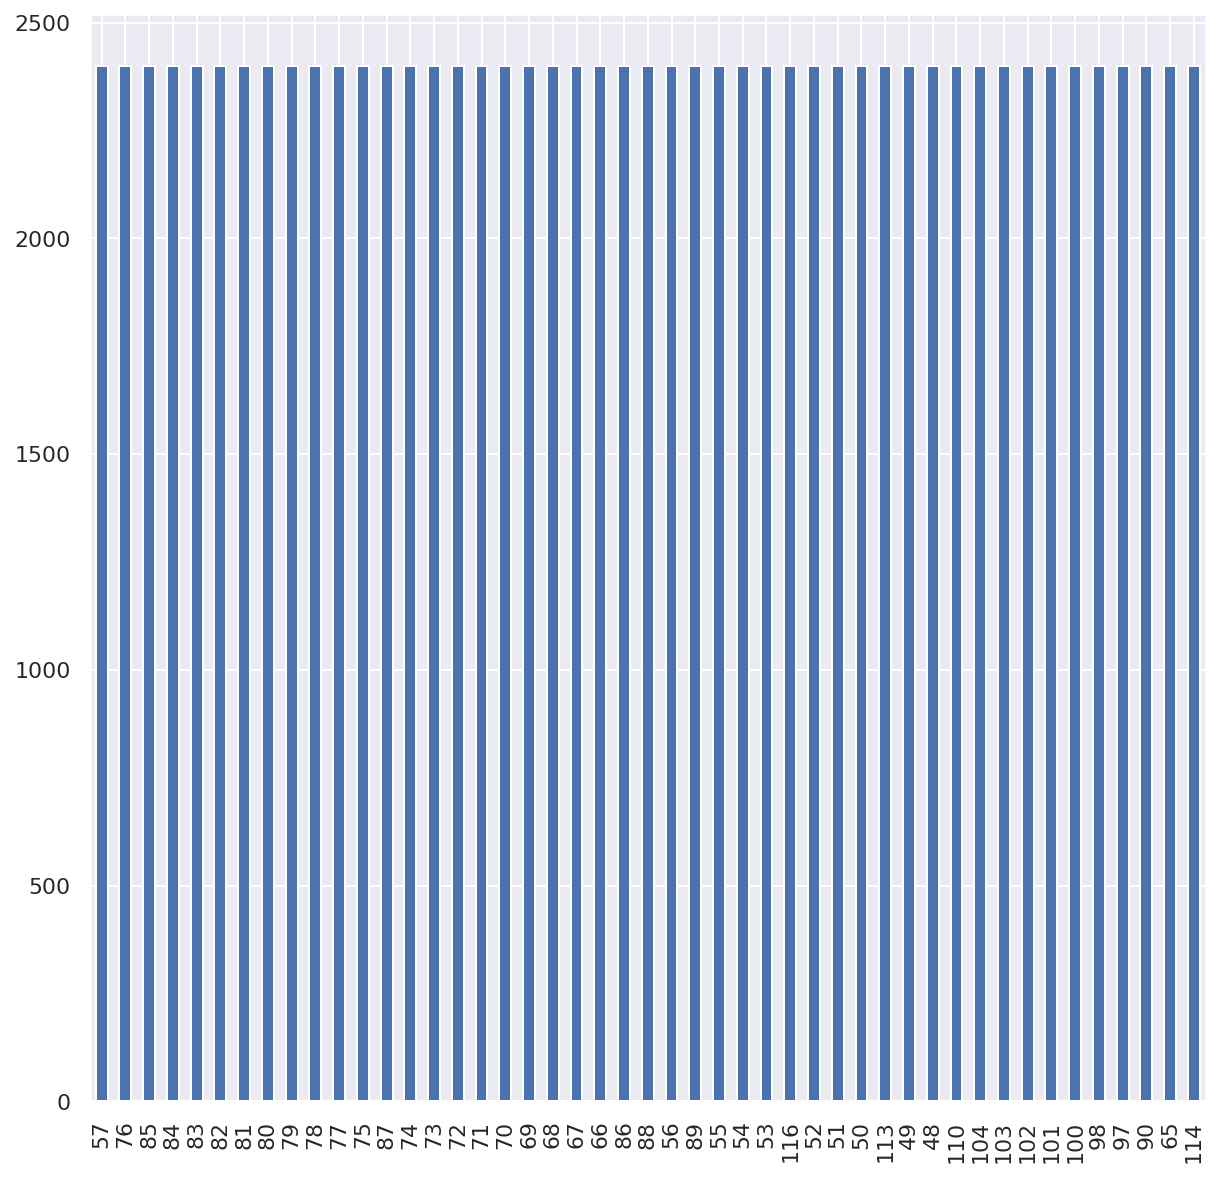

In [52]:
target_values.value_counts().plot(kind='bar',figsize=(10,10))

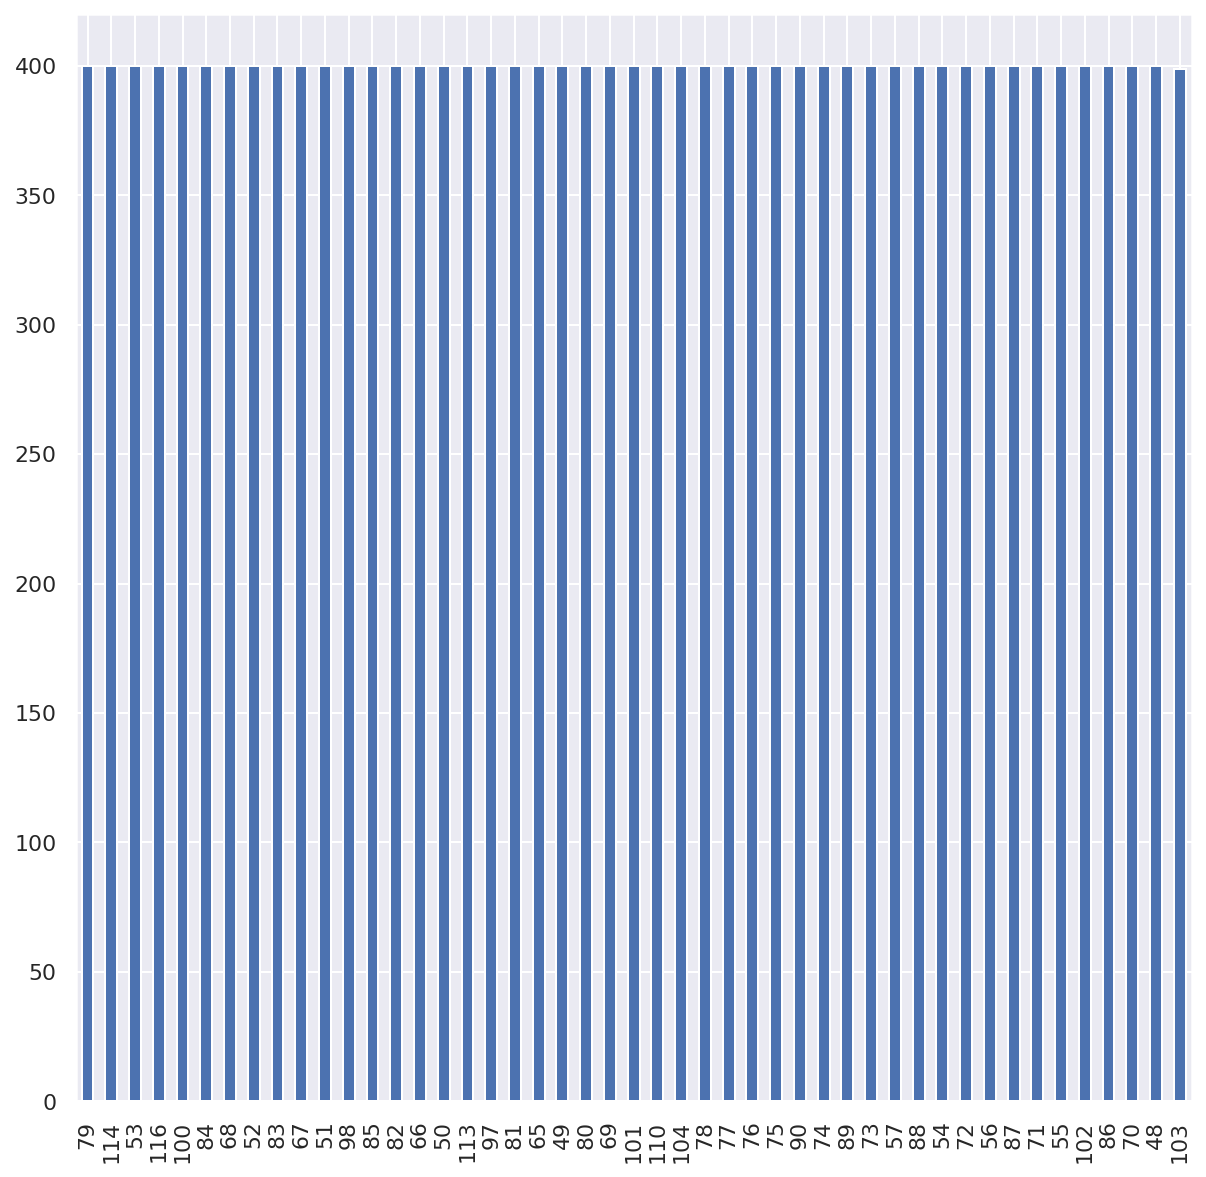

In [53]:
target_values_test.value_counts().plot(kind='bar',figsize=(10,10))

## **CREATING MAPPING TO ASCII AND PREPARING LABEL VECTOR** 

In [0]:
mapping={}
with open('/content/Character + Digits data/characters-digits-mapping.txt') as file:
    splitted_part=file.read().split("\n")
    try:
        for items in splitted_part:
              item_split=items.split(" ")
              mapping[int(item_split[0])]=int(item_split[1])
    except:
          pass



**BINARIZING VALUES**

In [0]:
final_labels=[]
for value in target_values.values:
  if int(mapping[value])>=65:

      final_labels.append("1")
  else:
      final_labels.append('0')

final_labels_test=[]
for value in target_values_test.values:
  if int(mapping[value])>=65:

      final_labels_test.append("1")
  else:
      final_labels_test.append('0')

In [30]:

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y= np_utils.to_categorical(final_labels, 2)
Y_test= np_utils.to_categorical(final_labels_test, 2)


print("After converting the output into a vector : ",Y[0])
final_labels[0]

After converting the output into a vector :  [0. 1.]


'1'

In [0]:
df_main['45']=df_main['45'].map(mapping)
df_test['41']=df_test['41'].map(mapping)

**CHECKING FOR CLASS IMBALANCE**

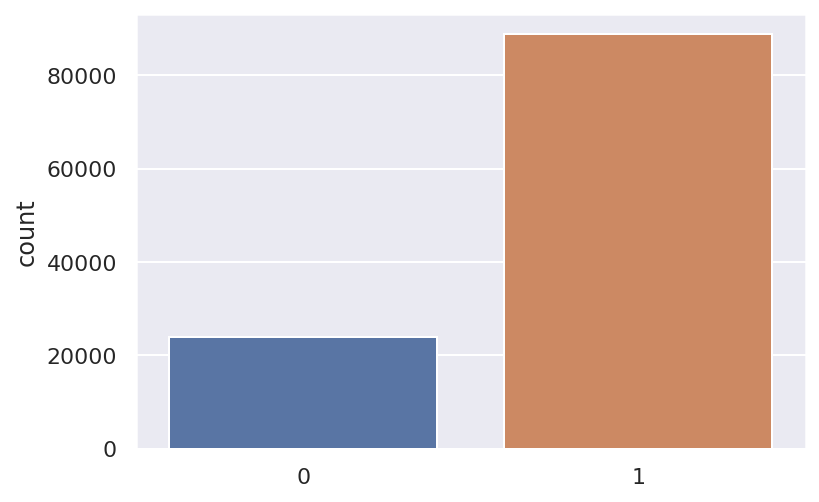

In [51]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x=final_labels)

**ITS A HIGHLY IMBALANCED DATASET**

# **VISUALIZING DATA**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


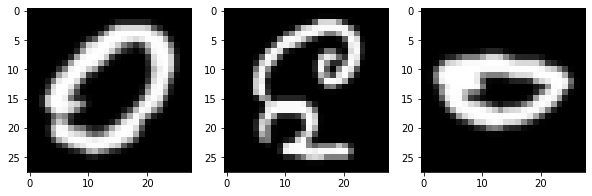

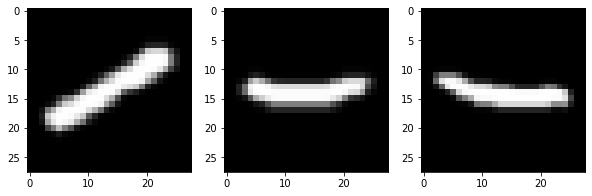

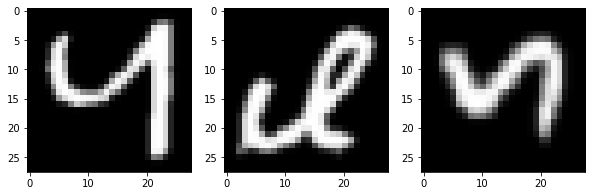

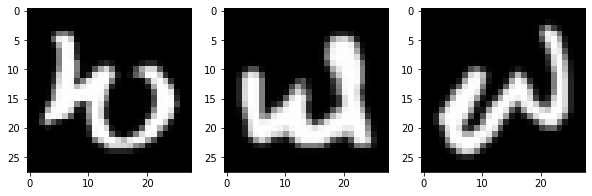

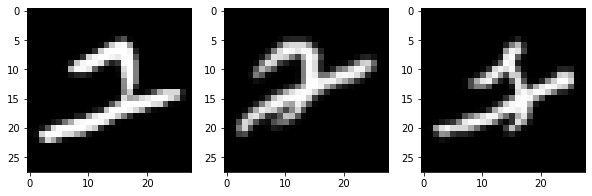

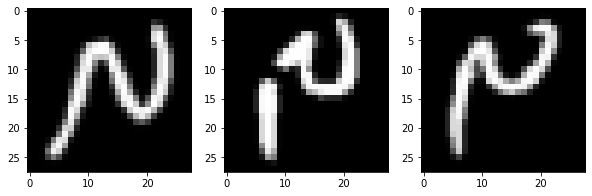

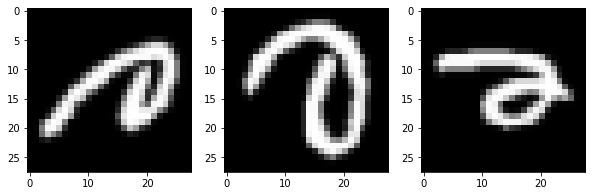

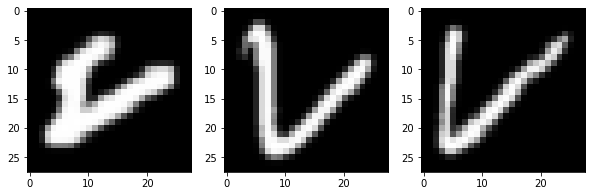

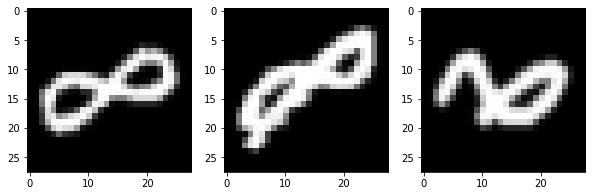

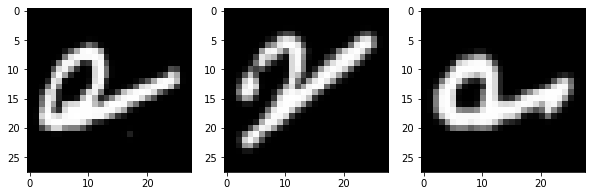

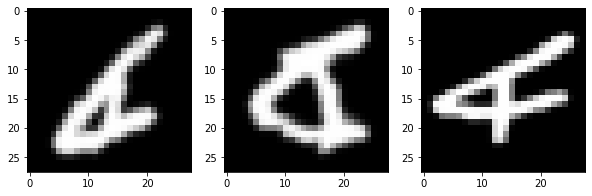

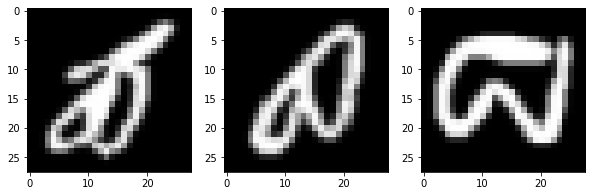

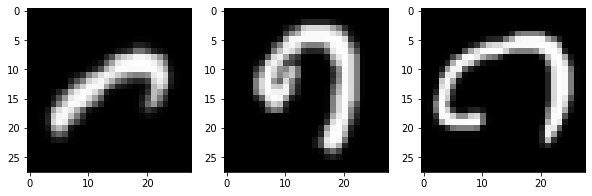

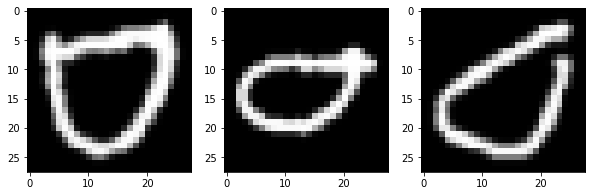

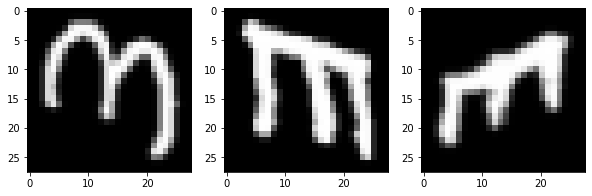

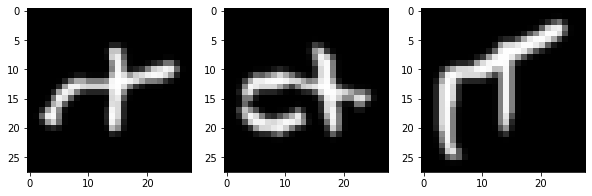

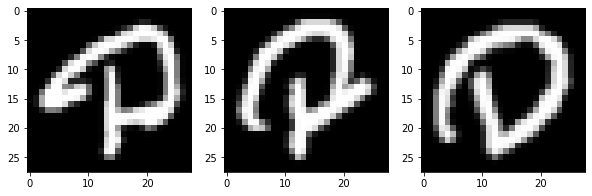

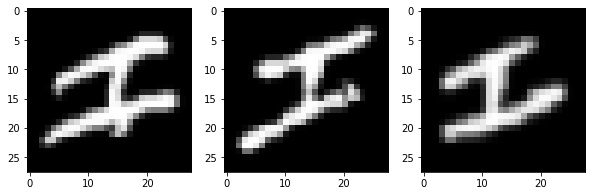

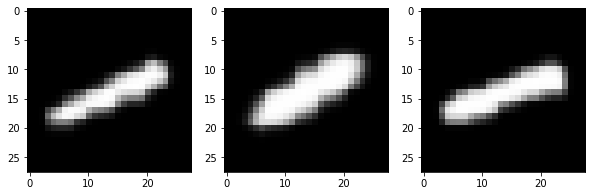

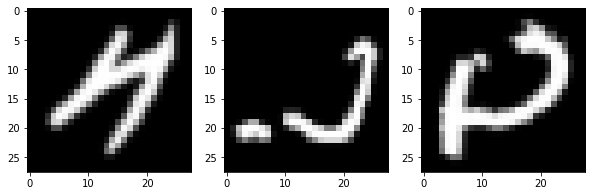

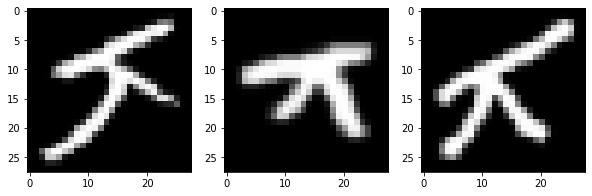

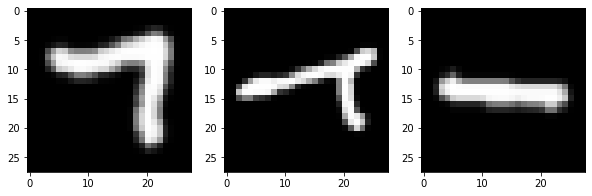

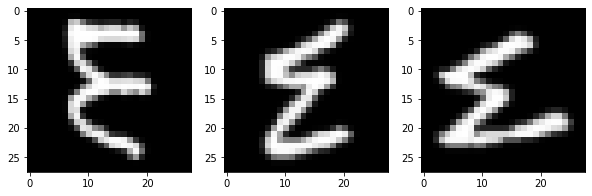

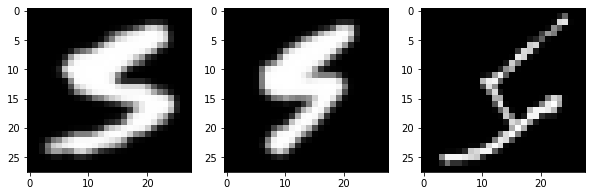

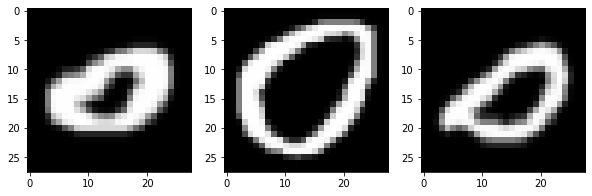

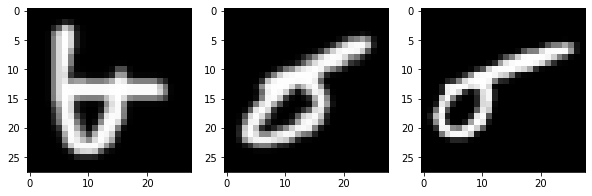

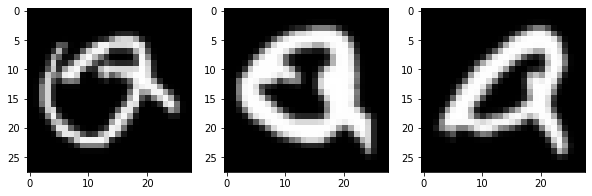

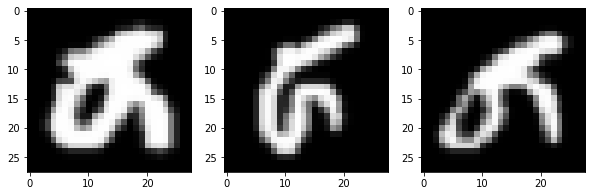

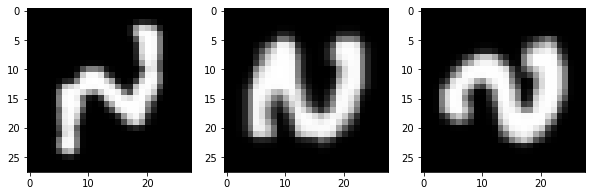

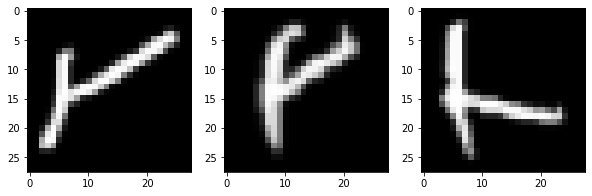

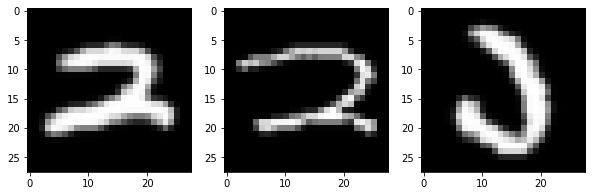

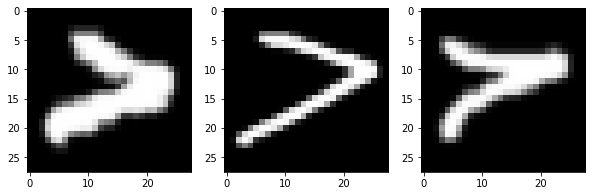

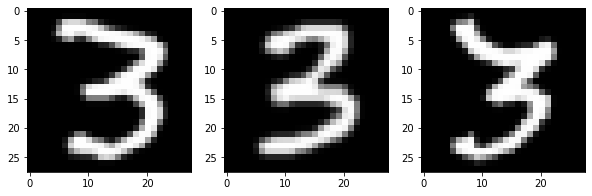

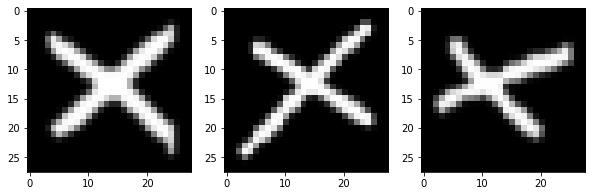

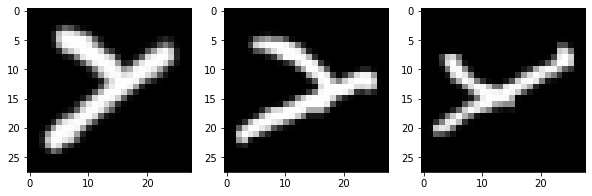

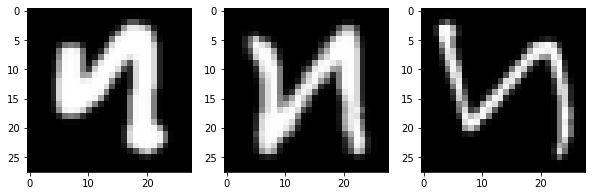

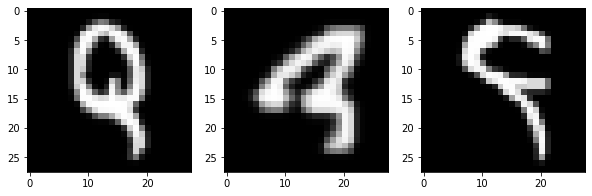

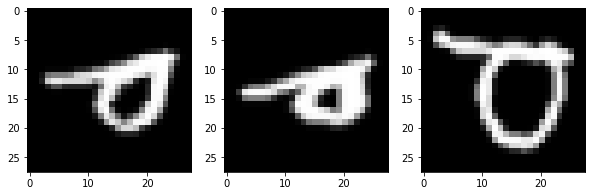

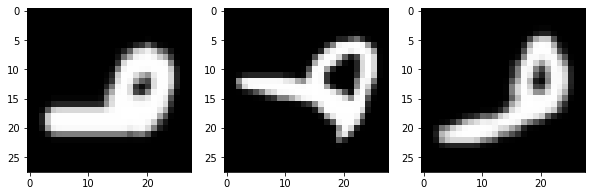

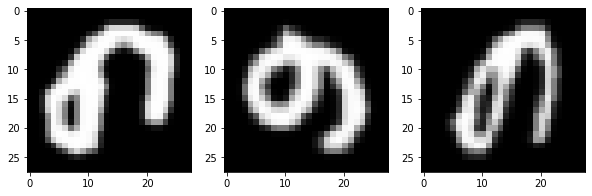

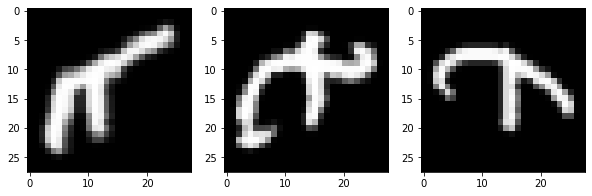

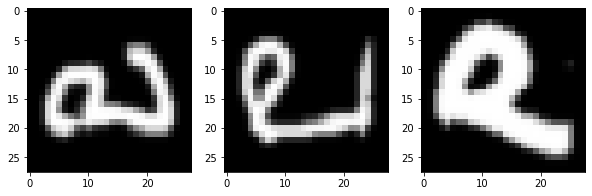

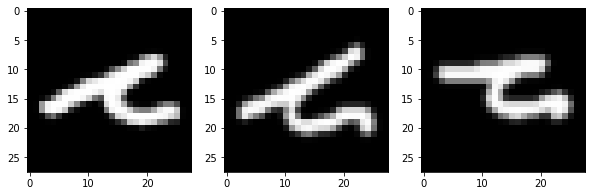

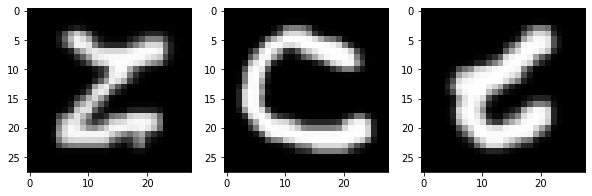

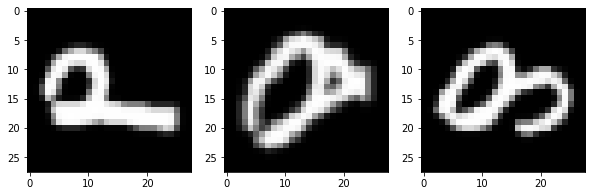

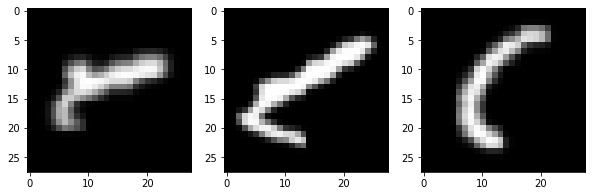

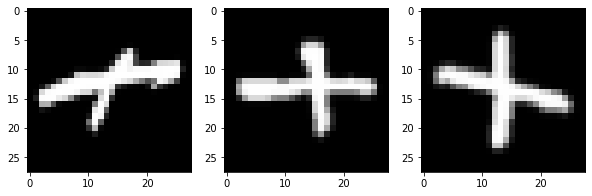

In [33]:
for i in range(47):
    index=np.where(df_test['41'].values.ravel()==mapping[i])
    images=df_prime_test.iloc[index].values[:3]
    fig,axes = plt.subplots(1, 3,figsize=(10,10))
    for j in range(3):
      axes[j].imshow(images[j].reshape(28,28), cmap='gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


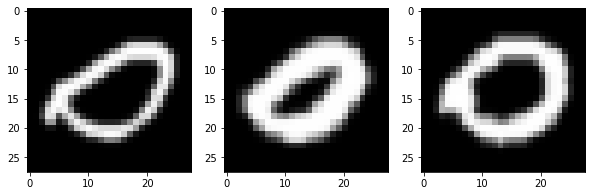

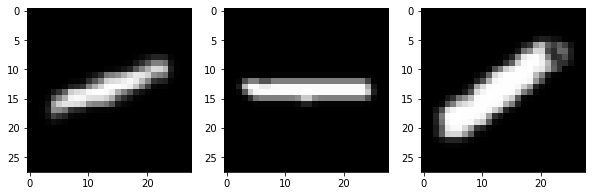

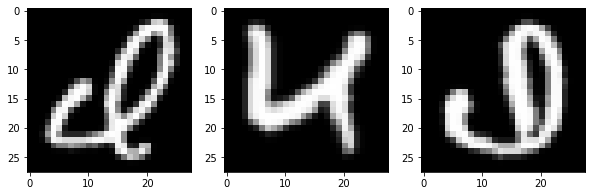

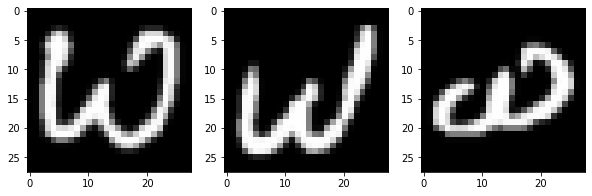

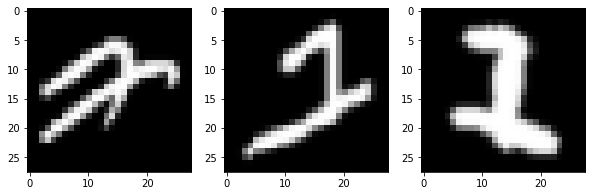

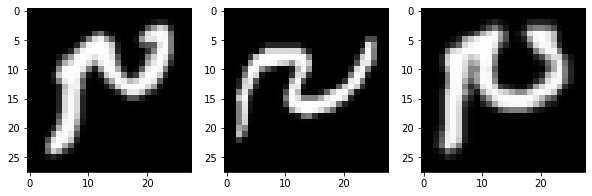

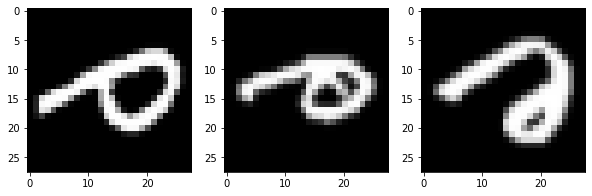

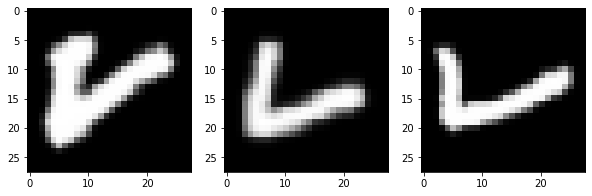

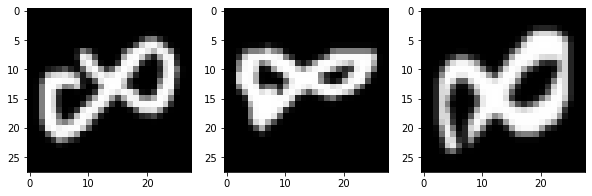

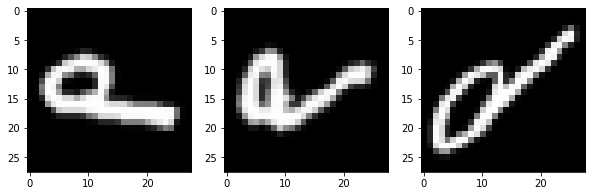

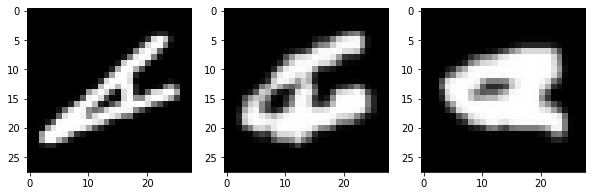

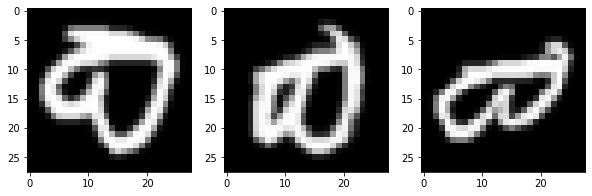

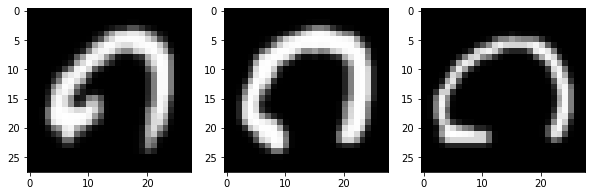

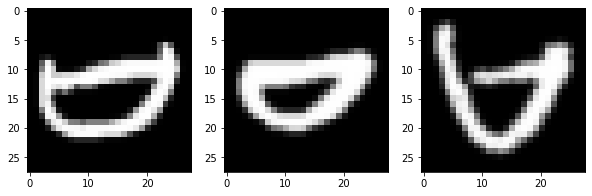

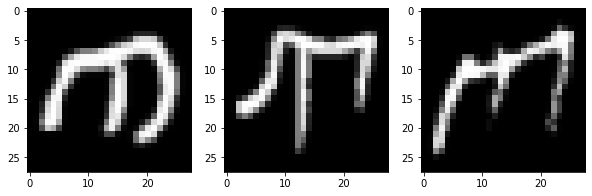

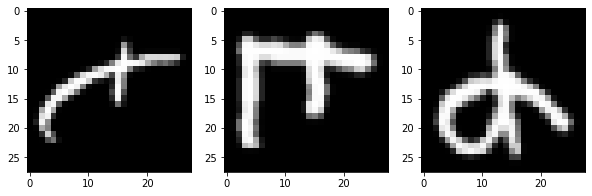

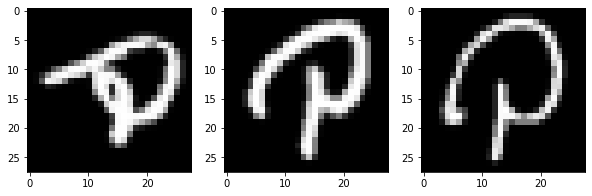

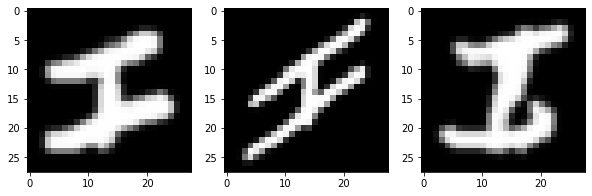

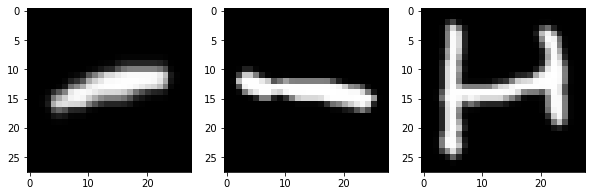

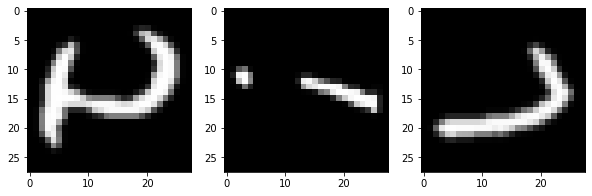

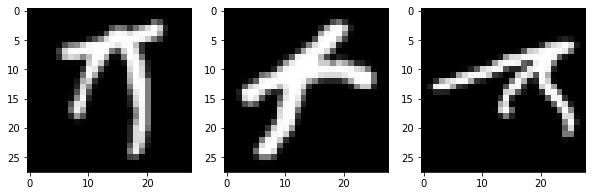

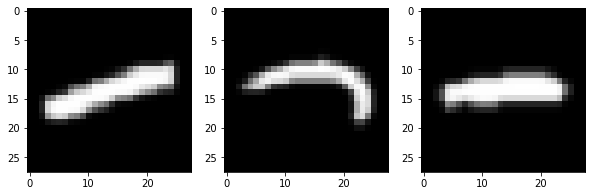

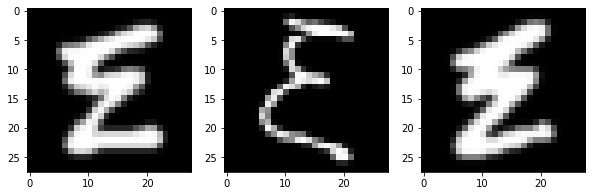

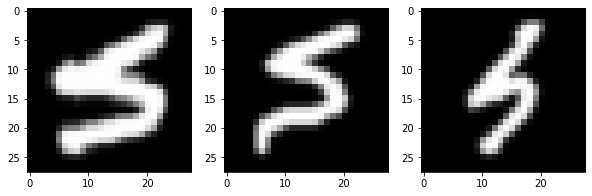

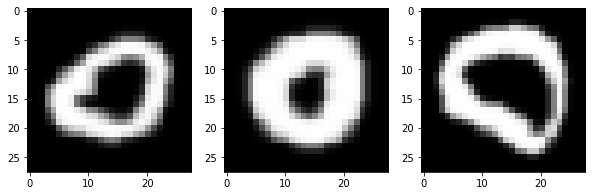

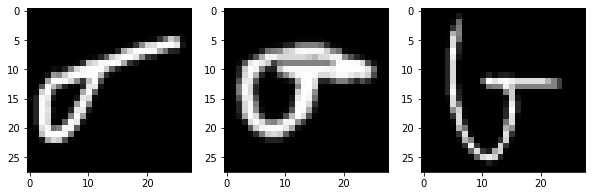

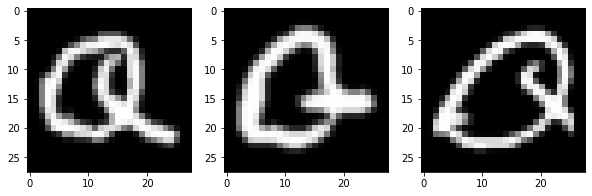

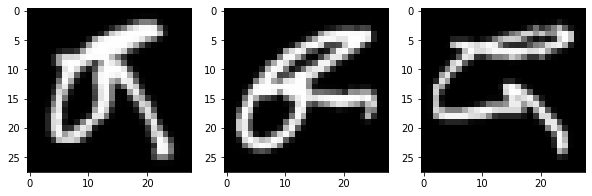

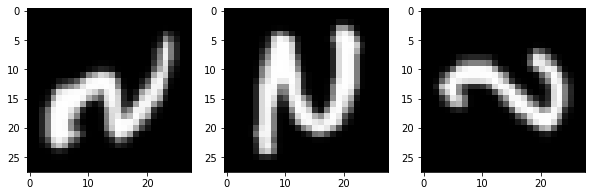

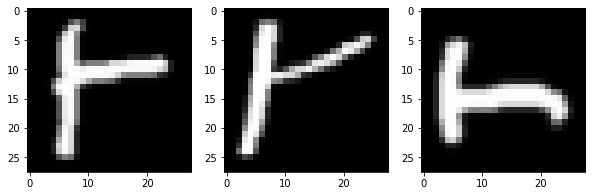

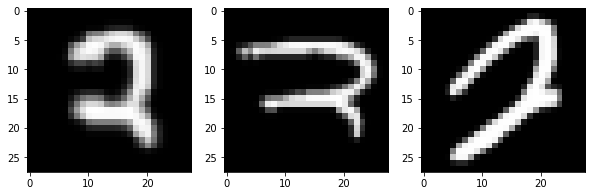

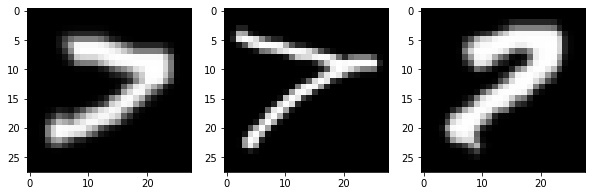

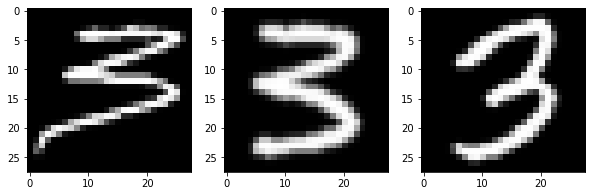

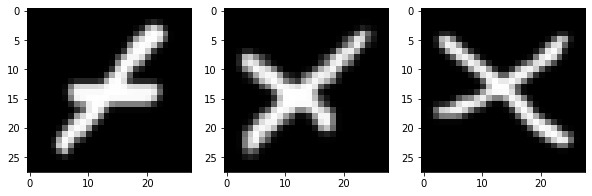

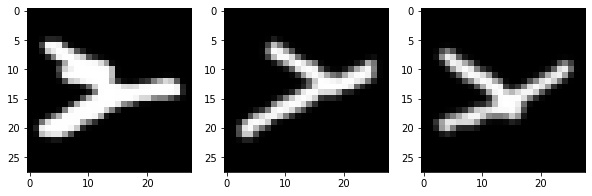

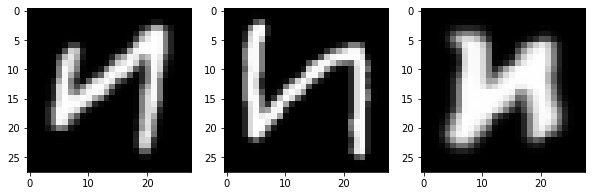

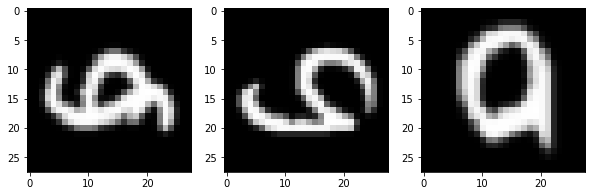

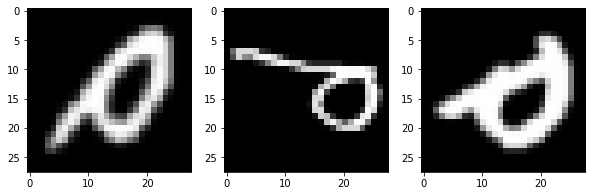

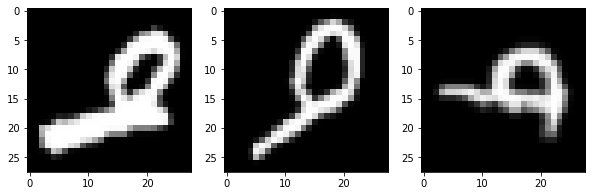

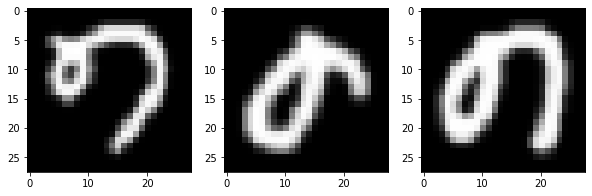

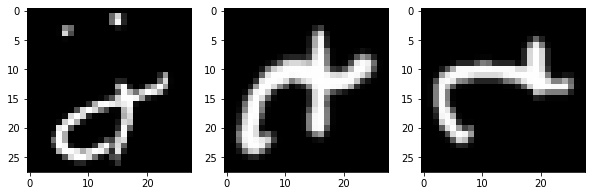

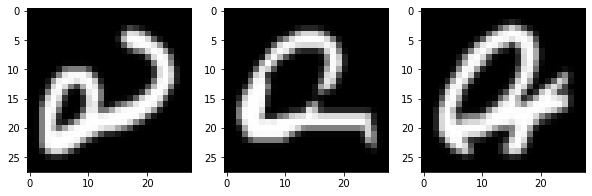

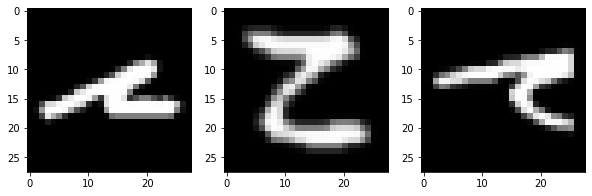

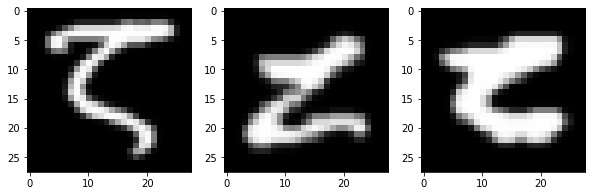

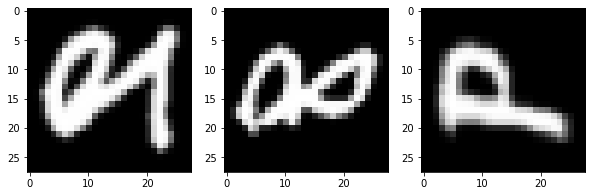

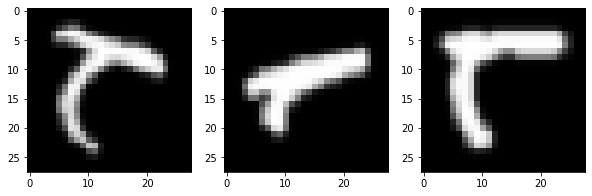

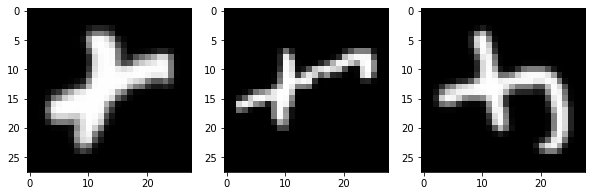

In [34]:
for i in range(47):
    index=np.where(df_main['45'].values.ravel()==mapping[i])
    images=df_prime.iloc[index].values[:3]
    fig,axes = plt.subplots(1, 3,figsize=(10,10))
    for j in range(3):
      axes[j].imshow(images[j].reshape(28,28), cmap='gray')

# **TRAIN TEST SPLIT**

In [35]:


# input image dimensions
img_rows, img_cols = 28, 28

x_train, x_cv, y_train, y_cv= train_test_split(df_prime.values,Y,test_size=0.33,random_state=42)
x_test=df_prime_test.values


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_cv = x_cv.reshape(x_cv.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_cv = x_cv.reshape(x_cv.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_cv = x_cv.astype('float32')
x_test=x_test.astype('float32')
x_cv /= 255
x_train /= 255
x_test/=255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_cv.shape[0], 'cross-validation samples')
print(x_test.shape[0],'Test samples')

x_train shape: (75575, 28, 28, 1)
75575 train samples
37224 cross-validation samples
18799 Test samples


# **TRAINING THE MODEL**

In [0]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.9,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model.hdf5', save_best_only=True, monitor='val_acc', mode='max')

In [0]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape,padding='SAME'))
model.add(Conv2D(64, (3,3), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(Dropout(0.6))

model.add(Conv2D(32, (5,5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Conv2D(32, (5, 5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Dropout(0.6))

model.add(Conv2D(64, (5, 5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 32)        51232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 32)       

**USING CLASS_WEIGHTS TO COUNTER CLASS IMBALANCE**

In [0]:
from sklearn.utils import class_weight
y_ints = [y.argmax() for y in y_train]
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_ints)

In [41]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(0.01),
              metrics=['accuracy'])
history=model.fit(x_train,y_train,
                epochs=40,
                batch_size=32,
                class_weight=class_weights,
                verbose=1,
                validation_data=(x_cv, y_cv),callbacks=[mcp_save,reduce_lr])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 75575 samples, validate on 37224 samples
Epoch 1/40
75575/75575 [==============================] - 44s 584us/step - loss: 0.3816 - acc: 0.8270 - val_loss: 0.3081 - val_acc: 0.8552
Epoch 2/40
75575/75575 [==============================] - 39s 513us/step - loss: 0.2811 - acc: 0.8751 - val_loss: 0.2666 - val_acc: 0.8777
Epoch 3/40
75575/75575 [==============================] - 40s 524us/step - loss: 0.2541 - acc: 0.8884 - val_loss: 0.1941 - val_acc: 0.9129
Epoch 4/40
75575/75575 [==============================] - 41s 547us/step - loss: 0.2351 - acc: 0.8962 - val_loss: 0.1769 - val_acc: 0.9206
Epoch 5/40
75575/75575 [==============================] - 40s 524us/step - loss: 0.2213 - acc: 0.9017 - val_loss: 0.1733 - val_acc: 0.9200
Epoch 6/40
75575/75575 [==============================] - 40s 524us/step - loss: 0.2107 - acc: 0.9073 - val_loss: 0.1660 - val_acc: 0.9202
Epoch 7/40
75575/75575 [==============================] - 40s 525us/step - loss: 0.1998 - acc: 0.9118 - val_loss: 0.

**PLOTS AND RESULTS**

In [0]:
model.load_weights("model.hdf5")

37224/37224 [==============================] - 5s 133us/step
Test loss: 0.1251189125623213
Test accuracy: 0.9405819458545247
Train loss: 0.10397172433411961
Train accuracy: 0.9529341713561154
CV loss: 0.1272592310029705
CV accuracy: 0.9416774124220932


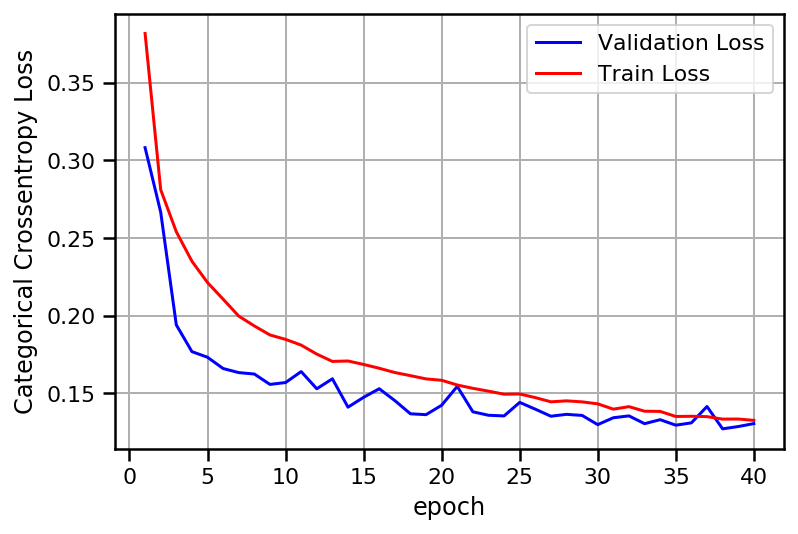

In [44]:

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'


score= model.evaluate(x_test, Y_test) 
score_train=model.evaluate(x_train,y_train)
score_cv=model.evaluate(x_cv,y_cv)

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

print('Train loss:', score_train[0]) 
print('Train accuracy:', score_train[1])

print('CV loss:', score_cv[0]) 
print('CV accuracy:', score_cv[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,40+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
model.save("model_task_1")  #downloading weights and architecture

# **CONCLUSIONS:**

1.Using a 3 layers CNN architecture we get very good results on our test data of over 93.87% accuracy.

2.We see that the dataset is unbalanced where letter are dominating the digits by alot and thus to remove this biasness we use class_weights.

3.To prevent overfitting we use dropout > 0.6 and reduce the number of convolutional layers.

4.Experimented with various learning rate techiniques such as Cyclic learning rates,ReduceonPleatea,and Optimizers and got best results with Adadelta.

5.Use of bactch normalization for smooth training and better results.


In [46]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Data","Loss", "Accuracy In %"]

x.add_row(["Test",0.12511891256232130,9405819458545247])

x.add_row(["Train",0.10397172433411961,0.9529341713561154])


x.add_row(["CV",127259231002970,0.94167741242209327])

print(x)

+-------+---------------------+--------------------+
|  Data |         Loss        |   Accuracy In %    |
+-------+---------------------+--------------------+
|  Test |  0.1251189125623213 |  9405819458545247  |
| Train | 0.10397172433411961 | 0.9529341713561154 |
|   CV  |   127259231002970   | 0.9416774124220932 |
+-------+---------------------+--------------------+
